# Сборный проект

Целью данного исследования является изучение продажи

Импортируем библиотеки для начала работы.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сохраним в переменную old_data копию оригинала датасета.

In [3]:
old_data = data.copy()

Выведем на экран первые пять строк датасета и изучим особенности данных.

In [4]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Построим гистограммы для столбцов датасета методом .hist()

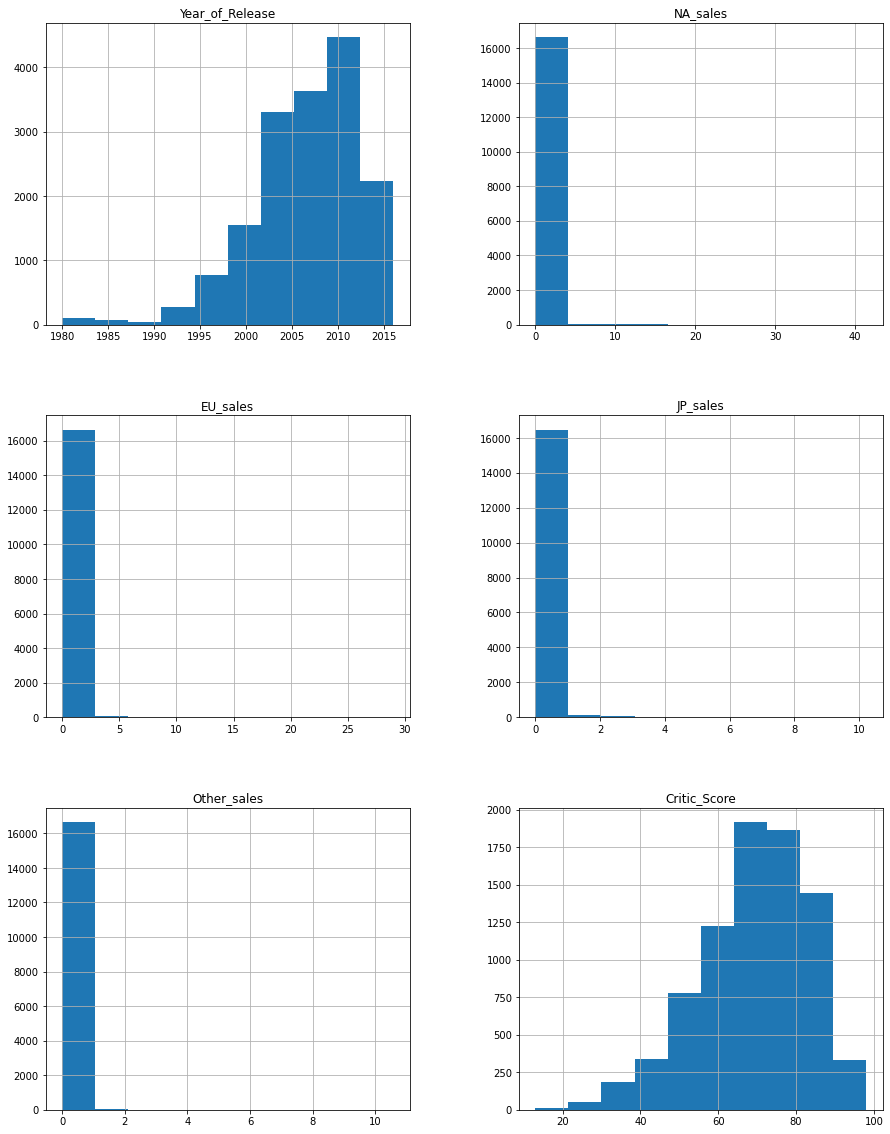

In [5]:
data.hist(figsize=(15, 20));

# Предообработка данных.

Выполним предообработку данных. Для начала приведем столбцы к нижнему регистру с помощью метода str.lower().

In [6]:
data.columns = data.columns.str.lower()

In [7]:
display(data.head(100))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,3.78,2.17,1.31,0.31,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,3.56,2.35,0.98,0.62,97.0,9.1,E
98,Super Mario Bros. 2,NES,1988.0,Platform,5.39,1.18,0.70,0.19,NaN,NaN,NaN


Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Преобразуем данные в столбце year_of_release в формат Int64. 

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Воспользуемся методом duplicated().sum() и проверим присутствуют ли в датасете строки дубликаты.

In [9]:
data.duplicated().sum()

0

В датасете дубликаты не зафиксированы. Продолжаем обработку дальше.

Воспользуемся методом isna().sum() и определим количество пропусков в каждом из столбцов датасета. 

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Видим,что в датасете в некоторых столбцах присутствуют пропущенные значения. 
Существуют различные причины появления пропусков в исходных данных.
Человеческий фактор(неправильный ввод(ошибки), неправильная выгрузка данных).
Также причинами появления пропусков в данных могут быть проблемы технического характера(падение серверов, сбой в работе ПО).
Стоит помнить, что в нашем случае пропуски также могут иметь естественный характер. Например в столбце rating. Есть ряд игр, которым комиссия не провела процедуру присвоения рейтинга.

Далее изучим пропущенные значения в каждом столбце более детально и решим заполнять пропуски или нет.

1) Количество пропусков в столбцах name и genre незначительное, пропуски не заполняем.

2) Для стобца year_of_release количество пропусков равно 269. В данном столбце указан год выхода игры, заполнять данные пропуски средним/медианным значениями не стоит, так как на выходе можем получить недостоверные данные.

3) Столбец critic_score отражает оценку поставленную критиками. Данный столбец можно заполнить.

4) Столбец user_score отражает оценку поставленную пользователями. Данный столбец также можем заполнить.

5) В столбце rating содержатся данные о возрастном ограничении конкретной игры. С пропусками в данном столбце стоит быть аккуратнее, можем заполнить пропущенные значения - 'unknown'. 

Перед заполнением пропусков воспользуемся методом describe() и проверим присутствуют ли в столбце critic_score аномальные значения.

In [11]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Минимальный рейтинг - 13.00 , а максимальный 98.00. Данные значения вполне корректны, аномалий не выявленно.

Чтобы заполнить пропуски в столбце critic_score создадим функцию, которая будет присваивать медианное значение рейтинга пропущенному значению в зависимости от жанра игры.

In [12]:
for i in data['genre']:
    critic_score_rate = data.loc[data['genre']== i]['critic_score'].median()
    try:
        data.loc[data['genre'] == i, 'critic_score'] = data.loc[data['genre'] == i]['critic_score'].fillna(critic_score_rate)
    except:
        pass
data['critic_score'].value_counts()

69.0    2340
68.0    1698
75.0    1399
66.0    1183
70.0    1133
        ... 
29.0       3
13.0       1
17.0       1
22.0       1
21.0       1
Name: critic_score, Length: 82, dtype: int64

In [13]:
data['critic_score'].describe()

count    16713.000000
mean        69.675163
std          9.969003
min         13.000000
25%         67.000000
50%         70.000000
75%         75.000000
max         98.000000
Name: critic_score, dtype: float64

Приступим к заполнению пропусков в столбце user_score. Применим метод unique() и изучим все уникальные значения.

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутствует значения TBD (to be determined = будет определено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. 

Заменим значения TBD на NaN с помощью метода str.replace

In [15]:
data['user_score'] = data['user_score'].str.replace('tbd','NaN')

Изменим тип столбца user_score c object на float64 с помощью метода to_numeric.

In [16]:
pd.to_numeric(data['user_score'], errors='coerce')

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

Напишем функцию по аналогии со столбцом critic_score.

In [17]:
for i in data['genre']:
    user_score_rate = data.loc[data['genre']== i]['user_score'].median()
    try:
        data.loc[data['genre'] == i, 'user_score'] = data.loc[data['genre'] == i]['user_score'].fillna(user_score_rate)
    except:
        pass
data['user_score'].value_counts()

7.4    2670
NaN    2424
7.6    1255
7.8    1058
7.1     862
       ... 
0.6       2
0.3       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 102, dtype: int64

Воспользуемся методом unique() и изучим значения в столбце rating.

In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце присутствуют пропущенные значения. Заполним пропуски методом fillna на значение 'unknown'.

In [19]:
data['rating'] = data['rating'].fillna('unknown')

Воспользуемся методом isna().sum() и убедимся что выбранные нами пропущенные значения заполнены.

In [20]:
data.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         2
user_score           2
rating               0
dtype: int64

Воспользуемся методом shape и посмотрим были ли потеряны данные в результате предообработки.

In [21]:
data.shape[0] / old_data.shape[0]

1.0

Данные сохранены в полном объеме. 

Далее посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец (total_sales)

In [22]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,unknown


In [23]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

# Исследовательский анализ данных.

Проведем исследовательский анализ данных. Начнем с анализа количества выпущенных игр в разные годы. Воспользуемся методом .groupby() и count() и подсчитаем количество игр по годам.

In [24]:
display(data.groupby('year_of_release')['year_of_release'].count())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Построим гистограмму для столбца year_of_release.

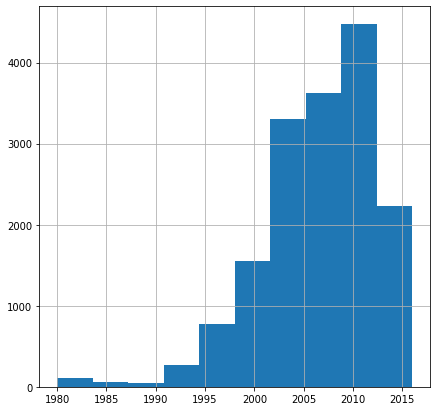

In [25]:
data['year_of_release'].hist(figsize=(7, 7));

Как видно на гистограмме индустрия разработки компьютерных игр начала ускоренный рост в конце 90х годов и достигла своего пика в 2010-2012. Далее произошел спад в два раза.

Попробуем определить топ 10 платформ и количество игр выпущенных на них в разные года. Для этого создадим переменную top_10_platforms куда запишем сводную таблицу. Отсортируем значения по убыванию. Далее напишем функцию, которая будет производить срез данных по платформе и сформирует сводную таблицу с годом выпуска и итоговыми продажами. Затем построим столбчатую диаграмму на основе получившейся таблицы. 

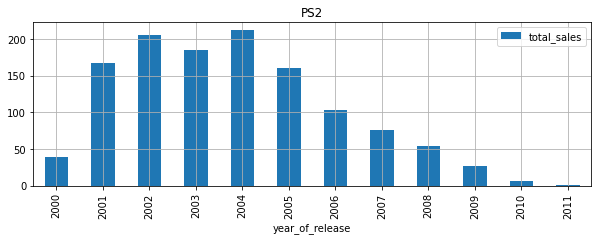

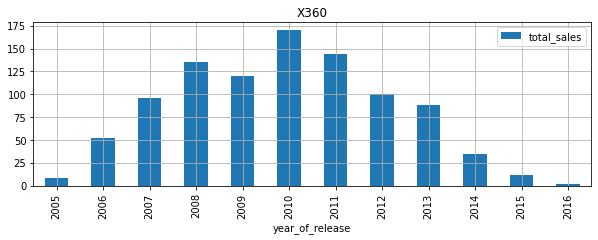

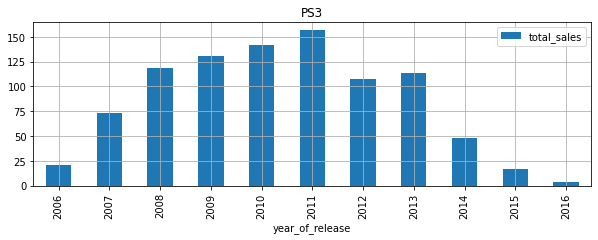

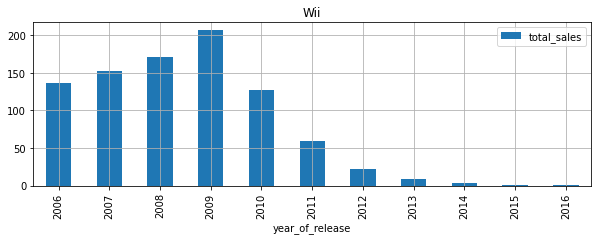

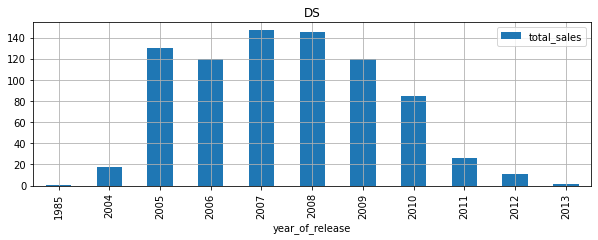

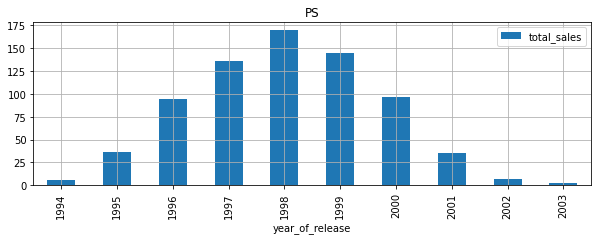

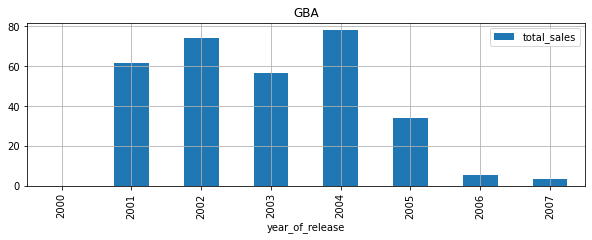

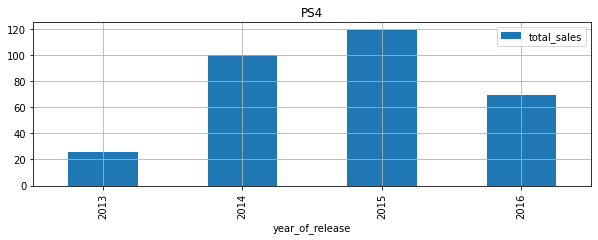

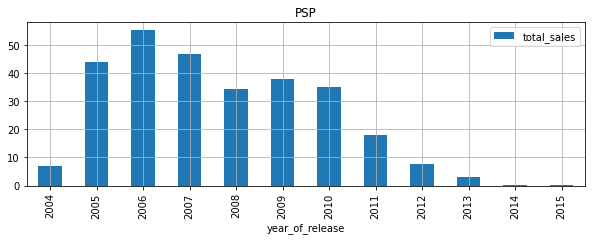

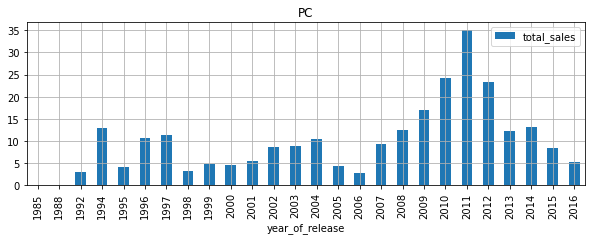

In [26]:
top_10_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_10_platforms.columns=['sum']
top_10_platforms = top_10_platforms.sort_values('sum', ascending = False).head(10)
top_10_platforms = top_10_platforms.reset_index() 
for i in top_10_platforms['platform']:
    data.query('platform ==@i').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(10, 3))
    plt.title(i)

Исходя из полученных данных можно сделать вывод, что средний срок жизни платформы составляет ~ 10 лет. Основная особенность что пика продаж платформа достигает в первые 5 лет, далее идёт спад и завершение цикла жизни платформы. 
Исключением является PC, так как это не только платформа для игр , но и универсальный инструмент для работы и мультимедиа.

Определим актуальный период для исследования. Так как целью задания является построить прогноз на 2017 год, то возьмем данные за пятилетний период с 2012 по 2016 год. Основной критерий на основании чего выбран данный период: 

Данные не слишком старые. Нет смысла использовать данные 80х,90х и 00х годов, так как сменилось несколько поколений консолей и в целом индустрия игр значительно выросла за несколько десятилетий.

Сделаем срез данных с помощью метода query с 2012 года. Посчитаем суммарные продажи по платформам и отсортируем значения по убыванию. Далее построим столбчатую диаграмму.

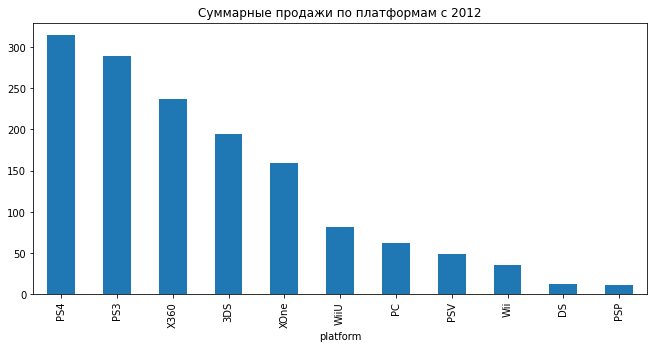

In [27]:
actual_period = data.query('year_of_release>=2012')
actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(11,5),kind="bar",title='Суммарные продажи по платформам с 2012');

Топ 3 самых прибыльных платформ за период с 2012 по 2016 год: PS4, PS3, X360.

In [28]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

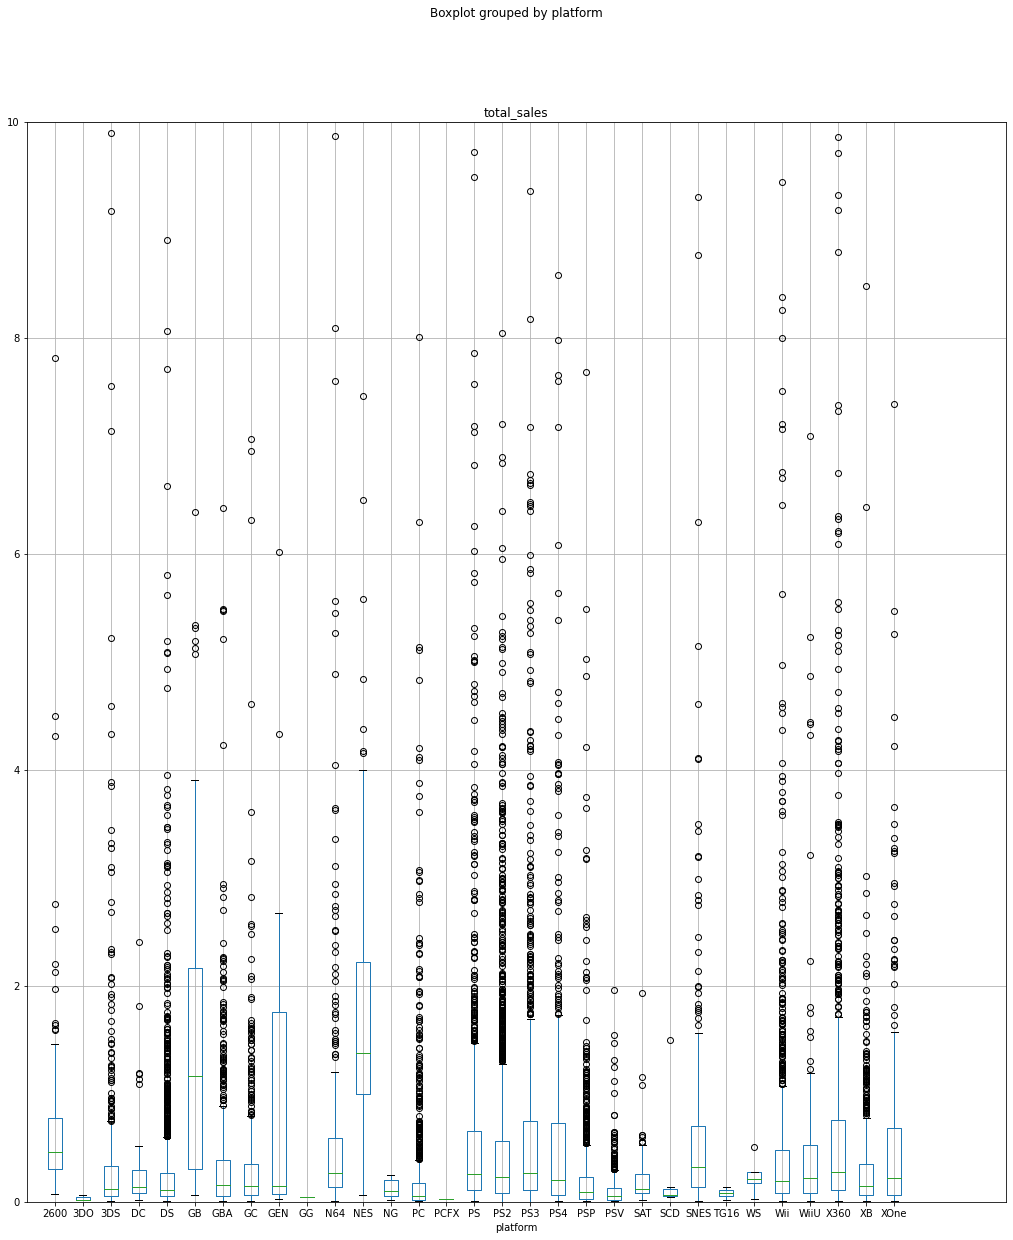

In [29]:
data.boxplot(by='platform', column='total_sales', figsize=(17,20))

plt.xlim(0, 35)
plt.ylim(0, 10)
plt.show();

На графике можно выявить платформы с высокими продажами в рамках их "цикла жизни", например консоли GB, GEN, NES, PS4 и другие.

Возьмем для примера консоль PS4 и построим диаграмму рассеяния и выявим взаимосвязь оценки пользователей и итоговых продаж. 

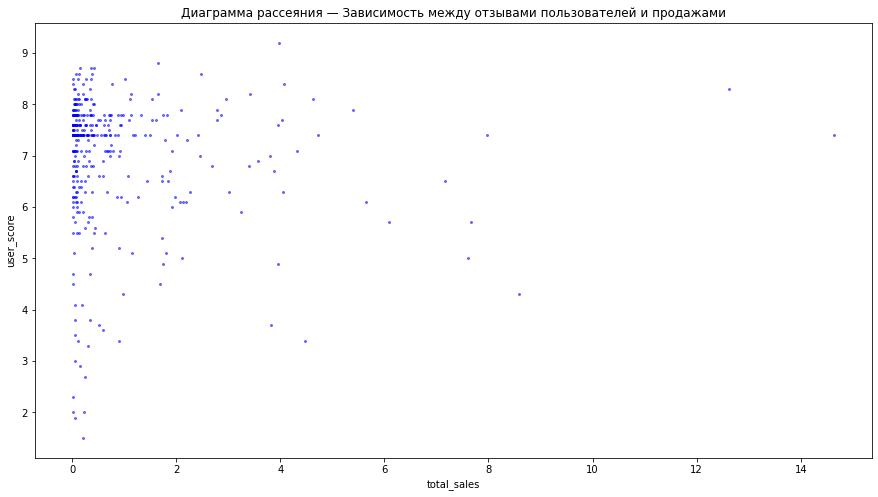

In [30]:
data[data['platform']=='PS4'].plot(kind='scatter',
        y='user_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость между отзывами пользователей и продажами');

Как видно на диаграмме, высокая оценка пользователей еще не является гарантией высоких продаж. Есть некоторые игры с рейтингом ниже 4 и 5 но с хорошими продажами и наоборот. 

Теперь построим аналогичную диаграмму, но уже с оценками критиков. 

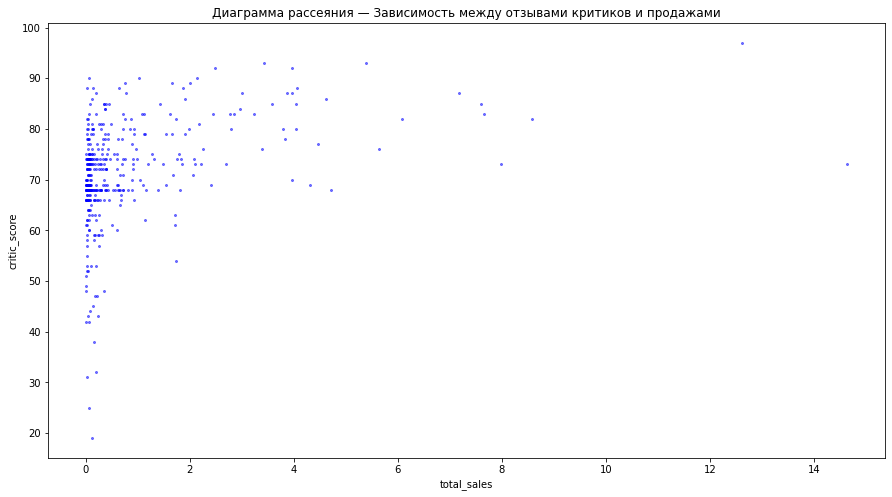

In [31]:
data[data['platform']=='PS4'].plot(kind='scatter',
        y='critic_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость между отзывами критиков и продажами');

Ситуация аналогична предыдущей диаграмме. Вероятно оценки не оказывают существенного влияния на продажи игр на платформе PS4. 

Попробуем проверить закономерность на платформе Xone. Построим аналогичную диаграмму. 

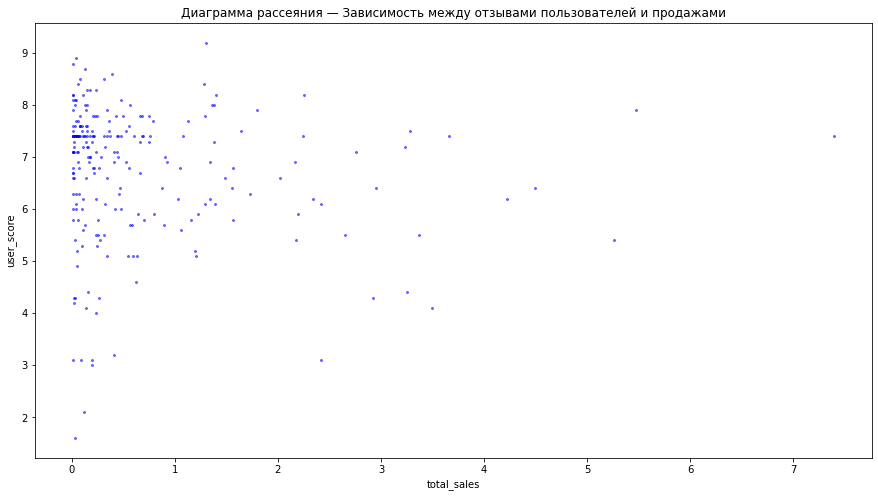

In [32]:
data[data['platform']=='XOne'].plot(kind='scatter',
        y='user_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость между отзывами пользователей и продажами');

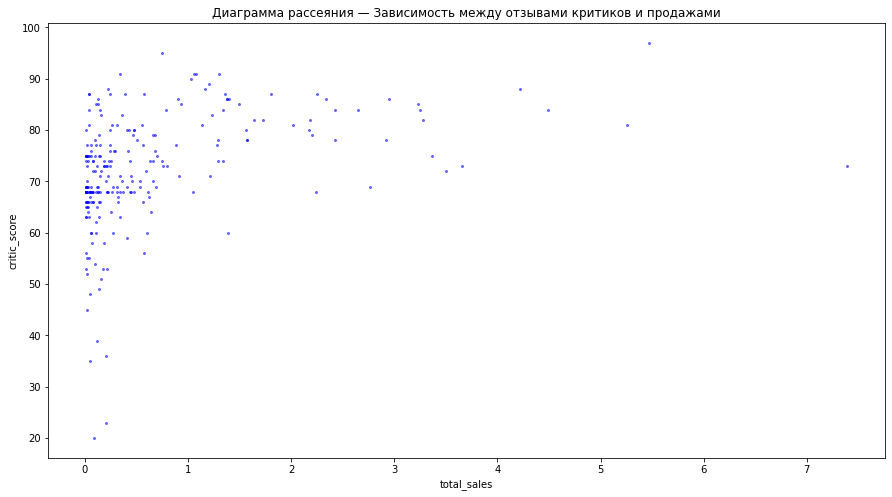

In [33]:
data[data['platform']=='XOne'].plot(kind='scatter',
        y='critic_score' , x='total_sales', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Зависимость между отзывами критиков и продажами');

Диаграмма очень похожа на предыдущие. Вероятно оценки критиков и пользователей не зависят от платформы и не оказывают существенного влияния на продажи.

Построим гистограмму для столбца genre. Проанализируем игр каких жанров было больше всего выпущено. 

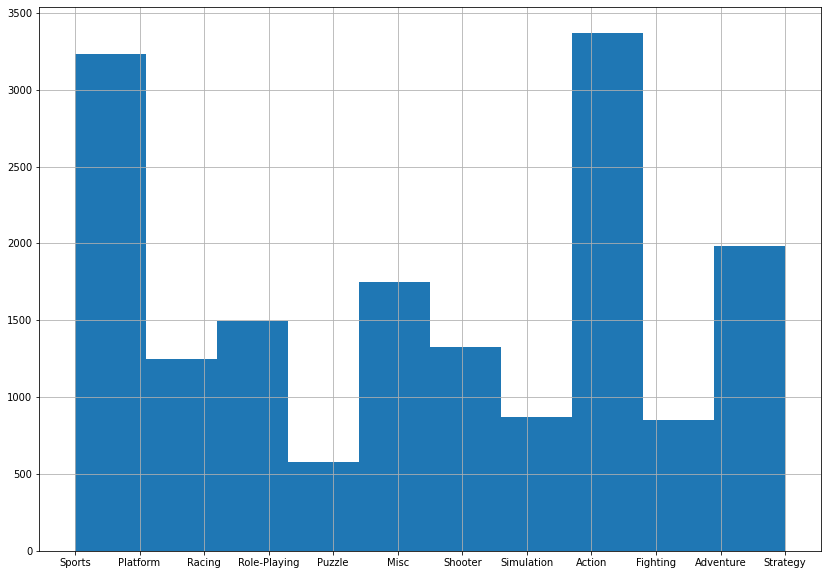

In [34]:
data['genre'].hist(figsize=(14, 10));

На гистограмме наблюдаем топ 3 самых популярных жанров: Action, sports и strategy.

Используем метод groupby и выявим жанры игр, которые лучше всего продавались. 

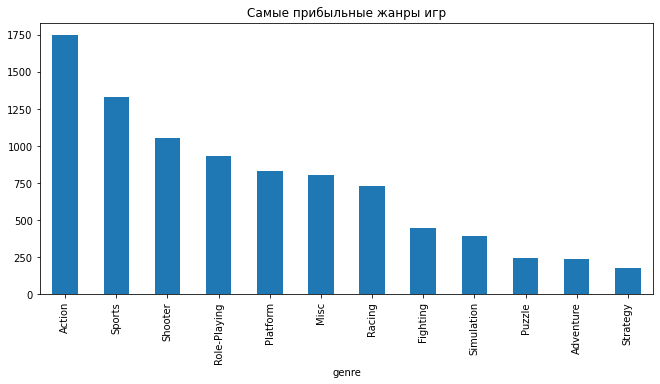

In [35]:
data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(11,5),kind="bar",title='Самые прибыльные жанры игр');

ТОП самых прибыльных жанров: Action, Sports, Shooter. ТОП самых не прибыльных жанров: Strategy, Adventure, Puzzle.
Интересно,что жанр strategy входит в ТОП 3 по количеству выпущенных игр, но занимает последнее место по продажам. 

# Портрет пользователя каждого региона.

Попробуем составить портрет пользователя каждого региона. Для этого воспользуемся методом groupby и построим круговую диаграмму для пользователя из Северной Америки. 

/tmp/ipykernel_368/140598235.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_portraits = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()


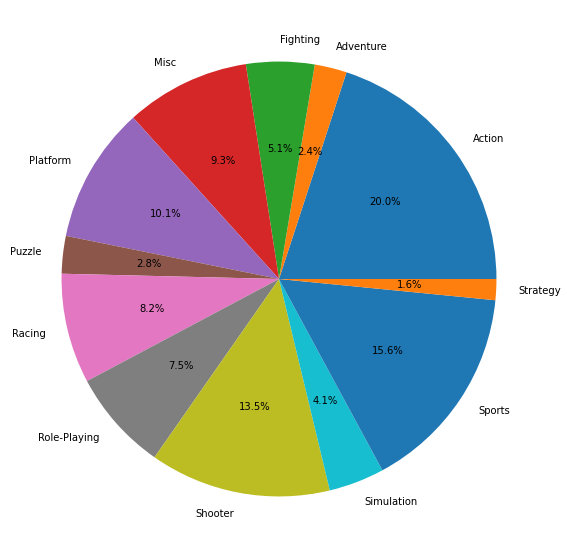

In [36]:
import matplotlib.pyplot as plt
data_portraits = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()
 

fig = plt.figure()
fig.set_size_inches(10,10)
data = data_portraits['na_sales']
my_labels = list(data_portraits.index)
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.show()

На диаграмме видны предпочтения игрока из Северной Америки. ТОП 5 жанров: Action - 20,0%, Sports- 15,6%, Shooter - 13,5%, Platform - 10,1%, Misc - 9,3%.

Повторим алгоритм для игрока из Европы. 

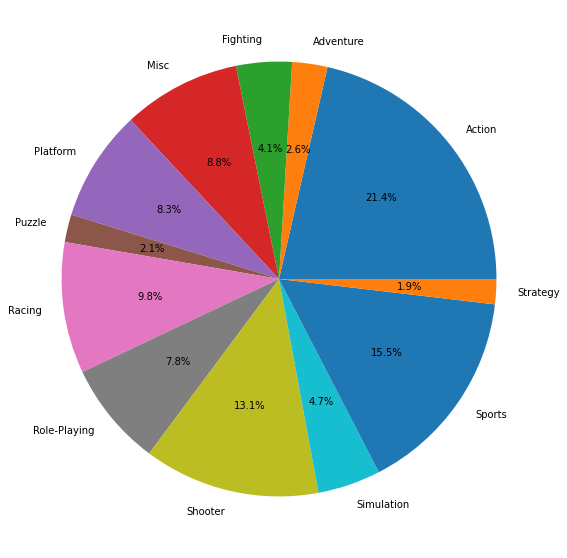

In [37]:
fig = plt.figure()
fig.set_size_inches(10,10)
data = data_portraits['eu_sales']
my_labels = list(data_portraits.index)
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.show()

Основное отличие у Европейского игрока - это наличие в топе жанра racing: Action - 21,4%, Sports - 15,5%, Shooter - 13,1% , Racing - 9,8%, Misc - 8,8 % Повторим тоже самое для игрока из Японии.

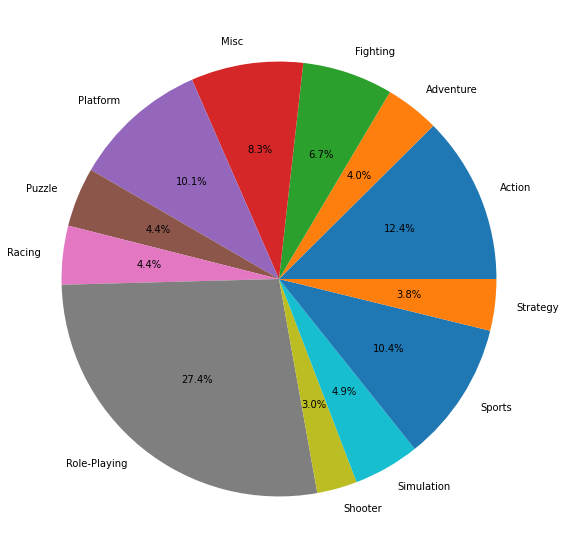

In [38]:
fig = plt.figure()
fig.set_size_inches(10,10)
data = data_portraits['jp_sales']
my_labels = list(data_portraits.index)
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.show()

Здесь уже кардинальные отличия: Role-Playing - 27,4%, Action - 12,4%, Sports - 10,4%, Platform - 10,1%, Misc - 8,3%.  

In [39]:
actual_rate = data.query('year_of_release>=2012')
actual_rate.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(figsize=(11,5),kind="bar",title='Суммарные продажи по платформам с 2012');

AttributeError: 'Series' object has no attribute 'query'

In [40]:
import matplotlib.pyplot as plt
data_rating = data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()
 

fig = plt.figure()
fig.set_size_inches(10,10)
data = data_rating['na_sales']
my_labels = list(data_rating.index)
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.show()

KeyError: 'rating'

In [ ]:
xbox_one = data[(data['platform'] == 'XOne') &  (data['user_score'] > 0)]['user_score']
pc = data[(data['platform'] == 'PC') &  (data['user_score'] > 0)]['user_score']
 
print('Средний пользовательский рейтинг платформы Xbox One:', xbox_one.mean())
print('Средний пользовательский рейтинг платформы PC', pc.mean())
 
alpha = .05
 
results = st.ttest_ind(xbox_one, pc)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")